<a href="https://colab.research.google.com/github/Alm3ida/calculo_numerico/blob/master/Eletromagnetismo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Métodos dos Momentos (MoM) - Eletromagnetismo**

Author:
- [Marcus Almeida](https://www.linkedin.com/in/marcus-vinicius-de-souza-almeida/)


## **1. Introdução**

Os problemas da área de **Eletromagnetismo**, - campo da física que estuda unificadamente os fenômenos da eletricidade e do magnetismo,principal os com uma relação direta com a prática, são por vezes muito **complexos** para a sua solução através de métodos analíticos. Assim, faz-se necessária a utilização de **métodos numéricos computacionai**s para a solução de tais problemas.

Os métodos números são algorimtos computacionais para a solução de problemas matemáticos através de **aproximações**, que tem o objetivo de tornar o problema mais simples ou alcançável. Tais métodos não são utilizados apenas no Eletromagnetismo, mas como em quase todas as áreas das Ciências Exatas e Engenharias.

Nesse trabalho, propõe-se a implementação do Método dos Momentos (MoM) para a solução do problema a seguir.

## **2. Problema**

Usando o Método de Momentos, escreva um programa de computador para determinar a distância de carga sobre uma placa quadrada muito fina e carregada, de comprimento de aresta $a$ em um potencial $V_0$, no espaço livre. Subdivida a placa em N partes quadradas e suponha que $a = 1 m$ e $V_0 = 1V$.

a) Tabule e organize os resultados para a densidade de carga superficial ($\rho _ s$) das partes utilizando $N = 100$ (dez partições em cada dimensão)

b) Calcule a carga total da placa, tendo (I) $N = 9$, (II) $N = 25$, (II) $N = 49$ e (IV) $N = 100$. 

---

# **Método dos Momentos**

O Método dos Momentos (MoM), também conhecido como método dos resíduos ponderados, é uma técnica de
resolução de equações integrais complexas por
redução destas a um sistema de equações lineares
simples. 

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Parametros da placa e divisões
list_of_N = [9, 25, 49, 
             64, 81, 100, 
             225, 625, 1225]


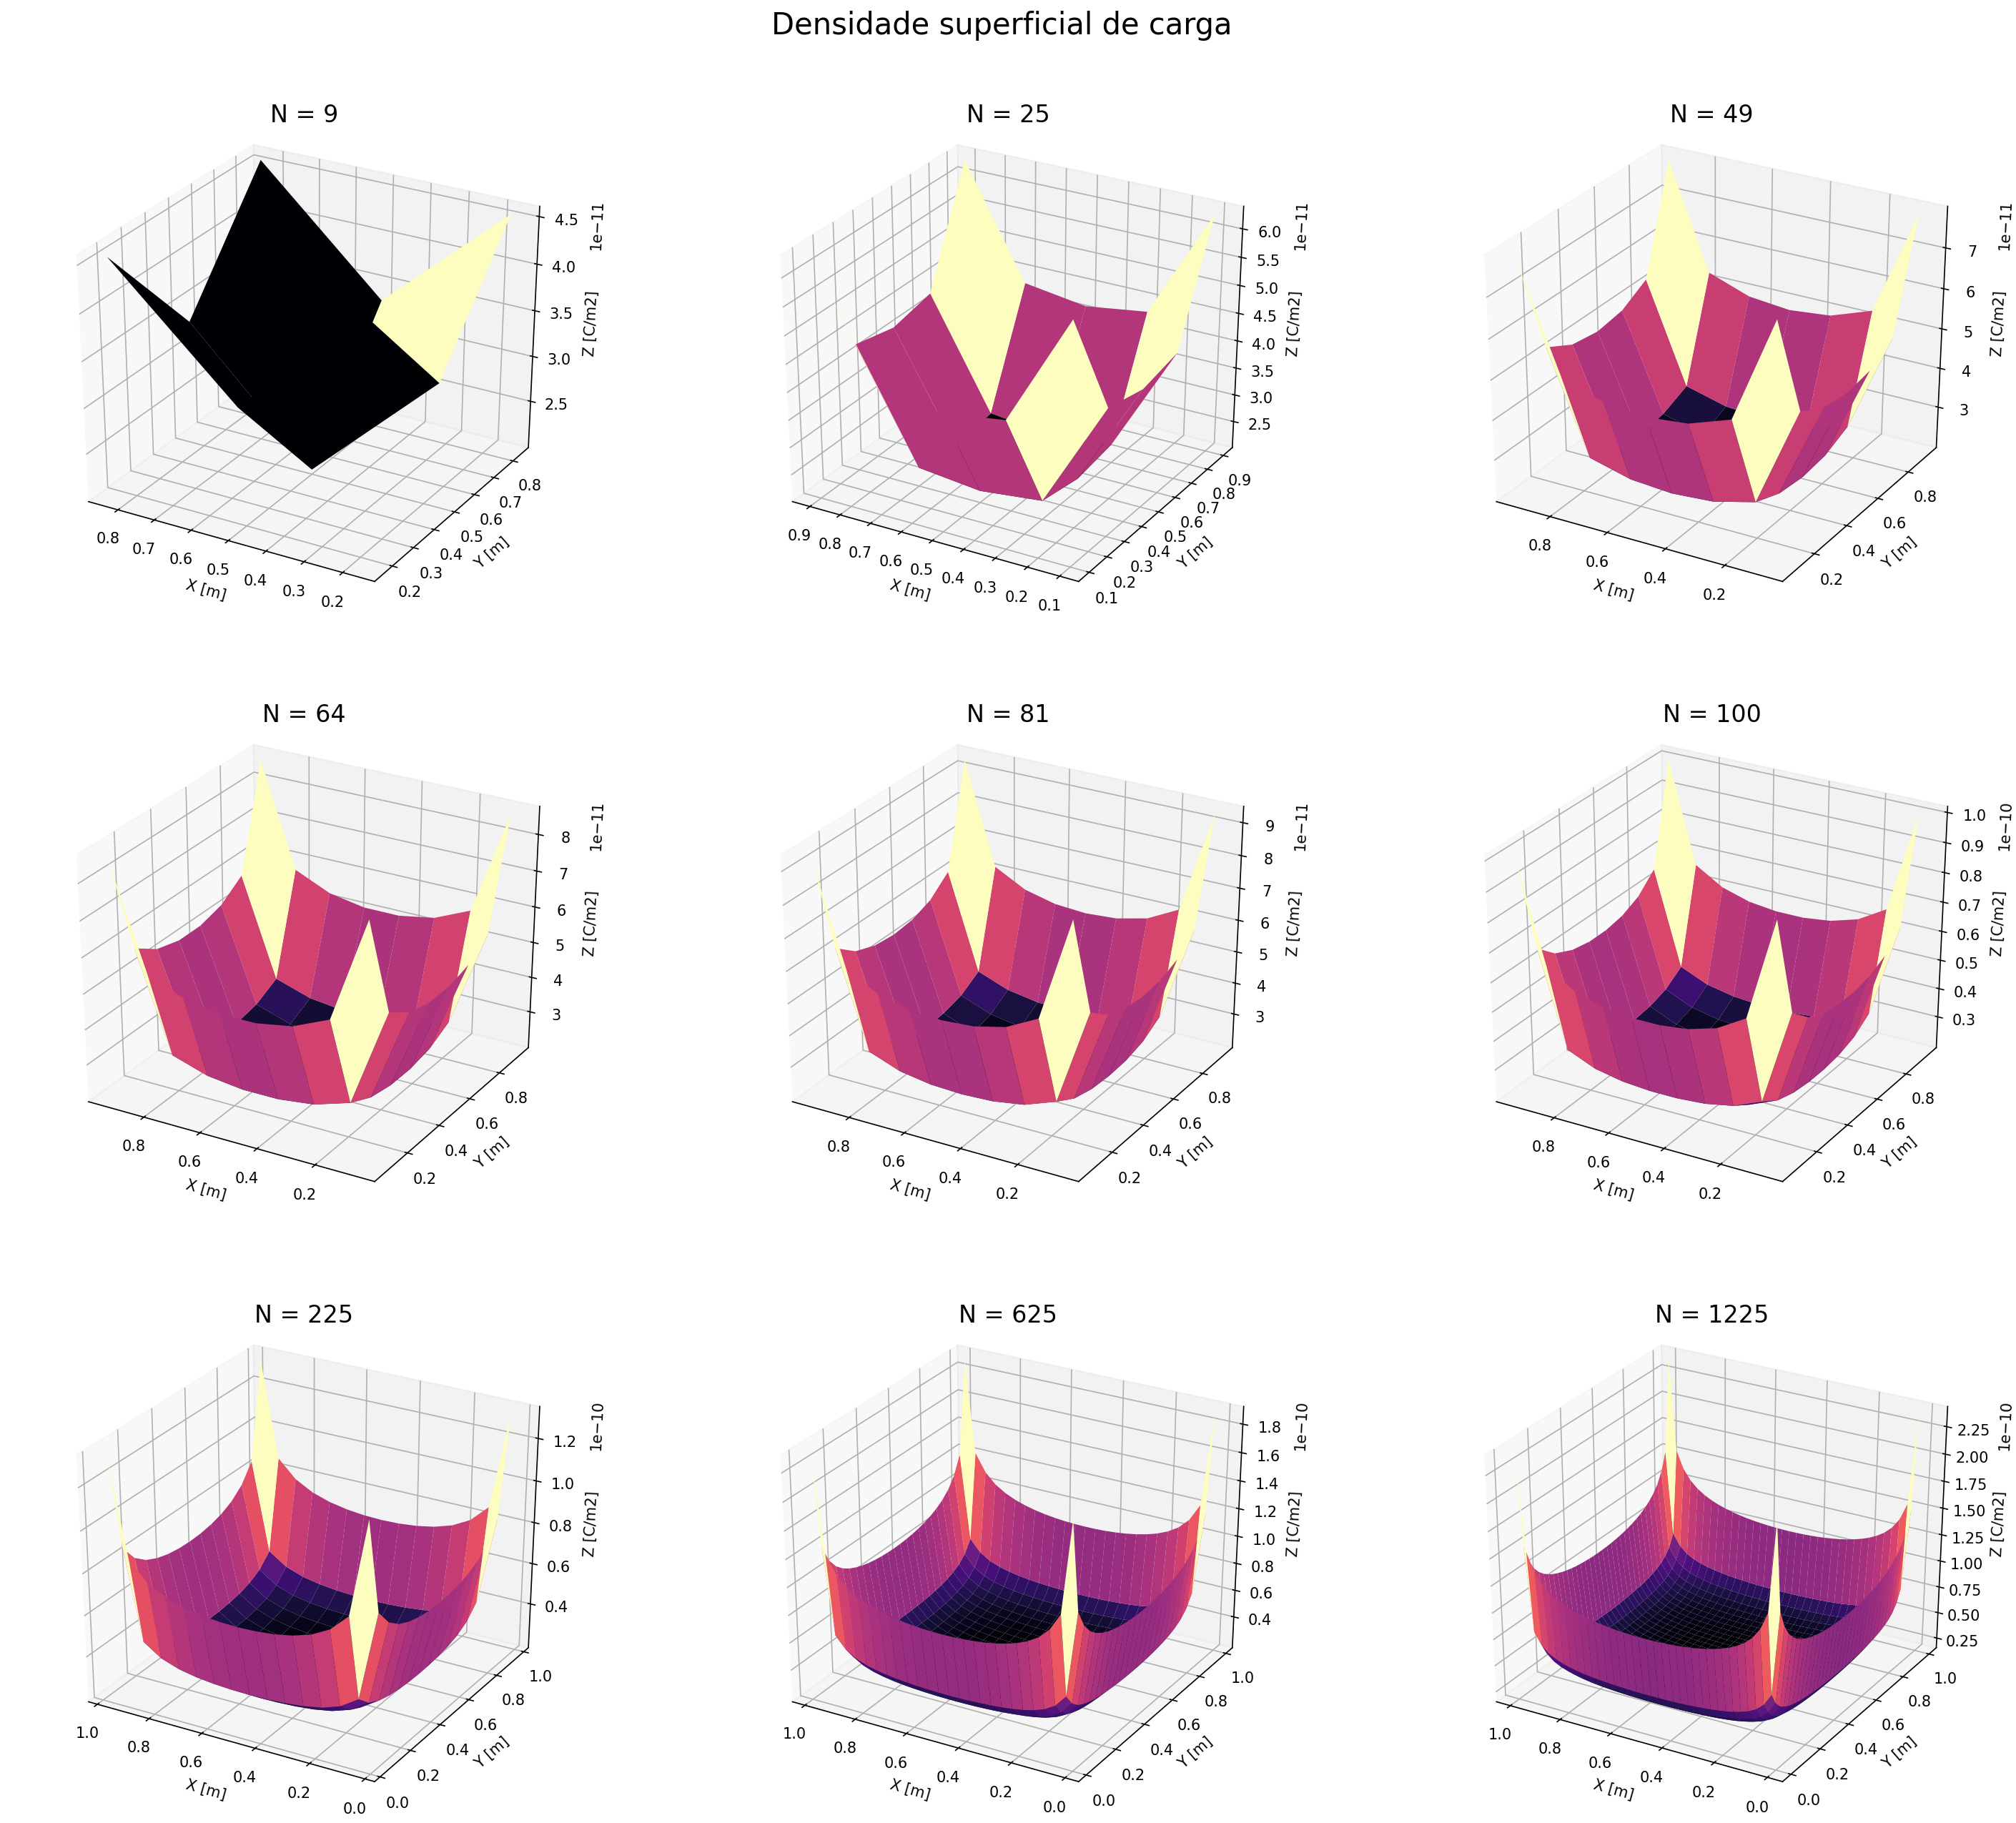

In [ ]:
def densidade_placa(N, lenght = 1):


  square_patchs = int(math.sqrt(N))
  a_double = lenght / square_patchs
  a = a_double / 2

  eps = 8.854 * 10 ** (-12) # Constante de permissividade no vácuo

  def density(x, y, x_m, y_m, a = a, a_double = a_double, eps = eps):
    
    Z = (a_double ** 2)/(4 * math.pi * eps * np.sqrt(np.power((x_m - x), 2)+ np.power((y_m - y), 2)))
    return Z

  def density_same(a = a, a_double = a_double, eps = eps):  

    Z = (2*a)/(2* math.sqrt(math.pi) * eps)
    return Z


  num = square_patchs + 1
  x_div = np.linspace(0, lenght, num)
  y_div = np.linspace(0, lenght, num)
  z_div = np.zeros(square_patchs)

  # Inicialização de variáveis no espaço R3
  xv, yv, zv = np.meshgrid(x_div, y_div, z_div)

  x_c = x_div[0:-1] + a
  y_c = y_div[0:-1] + a
  z_c = z_div.copy()


  # Variáveis para plot 3D, organiza os pontos em uma array tridimensional
  x_cv, y_cv = np.meshgrid(x_c, y_c)


  list_of_z = np.zeros((square_patchs, square_patchs))

  # Analisa todos os quadrados e aplica as funções
  matriz_z = []


  # Faz a escolha do quadrado de referência
  for i in range(x_c.shape[0]):
    for j in range(y_c.shape[0]):

      x_m = x_c[i]
      y_m = y_c[j]

      # Para todos os outros quadrados, analisa a posição e aplica a função adequada
      for m in range(x_c.shape[0]):
          for n in range(y_c.shape[0]):
            if ((m == i) and (n == j)):
              list_of_z[m][n] = density_same()
            else:
              list_of_z[m][n] = density(x = x_c[m], y = y_c[n], x_m = x_m, y_m = y_m)

      # Adiciona 
      linha_matriz = np.concatenate(list_of_z)
      matriz_z.append(linha_matriz)


  matriz_z_array = np.array(matriz_z)


  # Calcula a inversa da matriz para encontrar o potencial de cada quadrado
  inv_matrix = np.linalg.inv(matriz_z_array)

  one_vector = np.array([[1]] * matriz_z_array.shape[0])

  # Realiza o produto 
  resultado = np.matmul(inv_matrix, one_vector)

  z_func = np.array_split(resultado, square_patchs)
  z_func = np.stack(list(z_func)).reshape(square_patchs, square_patchs)

  return z_func, x_cv, y_cv, a_double ** 2


# Plot de gráficos 3D
fig = plt.figure(figsize = (8 * 3, 7 * 3), dpi = 150)
fig.tight_layout()

charge_sum = []

for graph in range(len(list_of_N)):
  result = densidade_placa(list_of_N[graph])
  z_func, x_cv, y_cv, square_area = result
  charge_sum.append((z_func * square_area).sum())

  ax = fig.add_subplot(331+graph, projection = '3d')

  X, Y = x_cv, y_cv
  Z = z_func

  plt.gca().invert_xaxis()
  plt.gca().invert_yaxis()

  ax.plot_surface(X, Y, Z, 
                  rstride=1, 
                  cstride=1,
                  cmap='magma',
                  edgecolor='none',
                  alpha = 1)
  ax.set_xlabel("X [m]")
  ax.set_ylabel("Y [m]")
  ax.set_zlabel("Z [C/m2]")
  # Plota o ponto de referência escolhido
  # ax.scatter(xv, yv, zv, color = "blue")
  # ax.scatter(x_m, y_m, 0, color = "red")
  ax.set_title(f'N = {list_of_N[graph]}', fontsize = 16, pad = 20);
fig.suptitle("Densidade superficial de carga", x=0.51, y=0.925, fontsize = 20)
plt.savefig('temp.png', bbox_inches='tight')
plt.show()


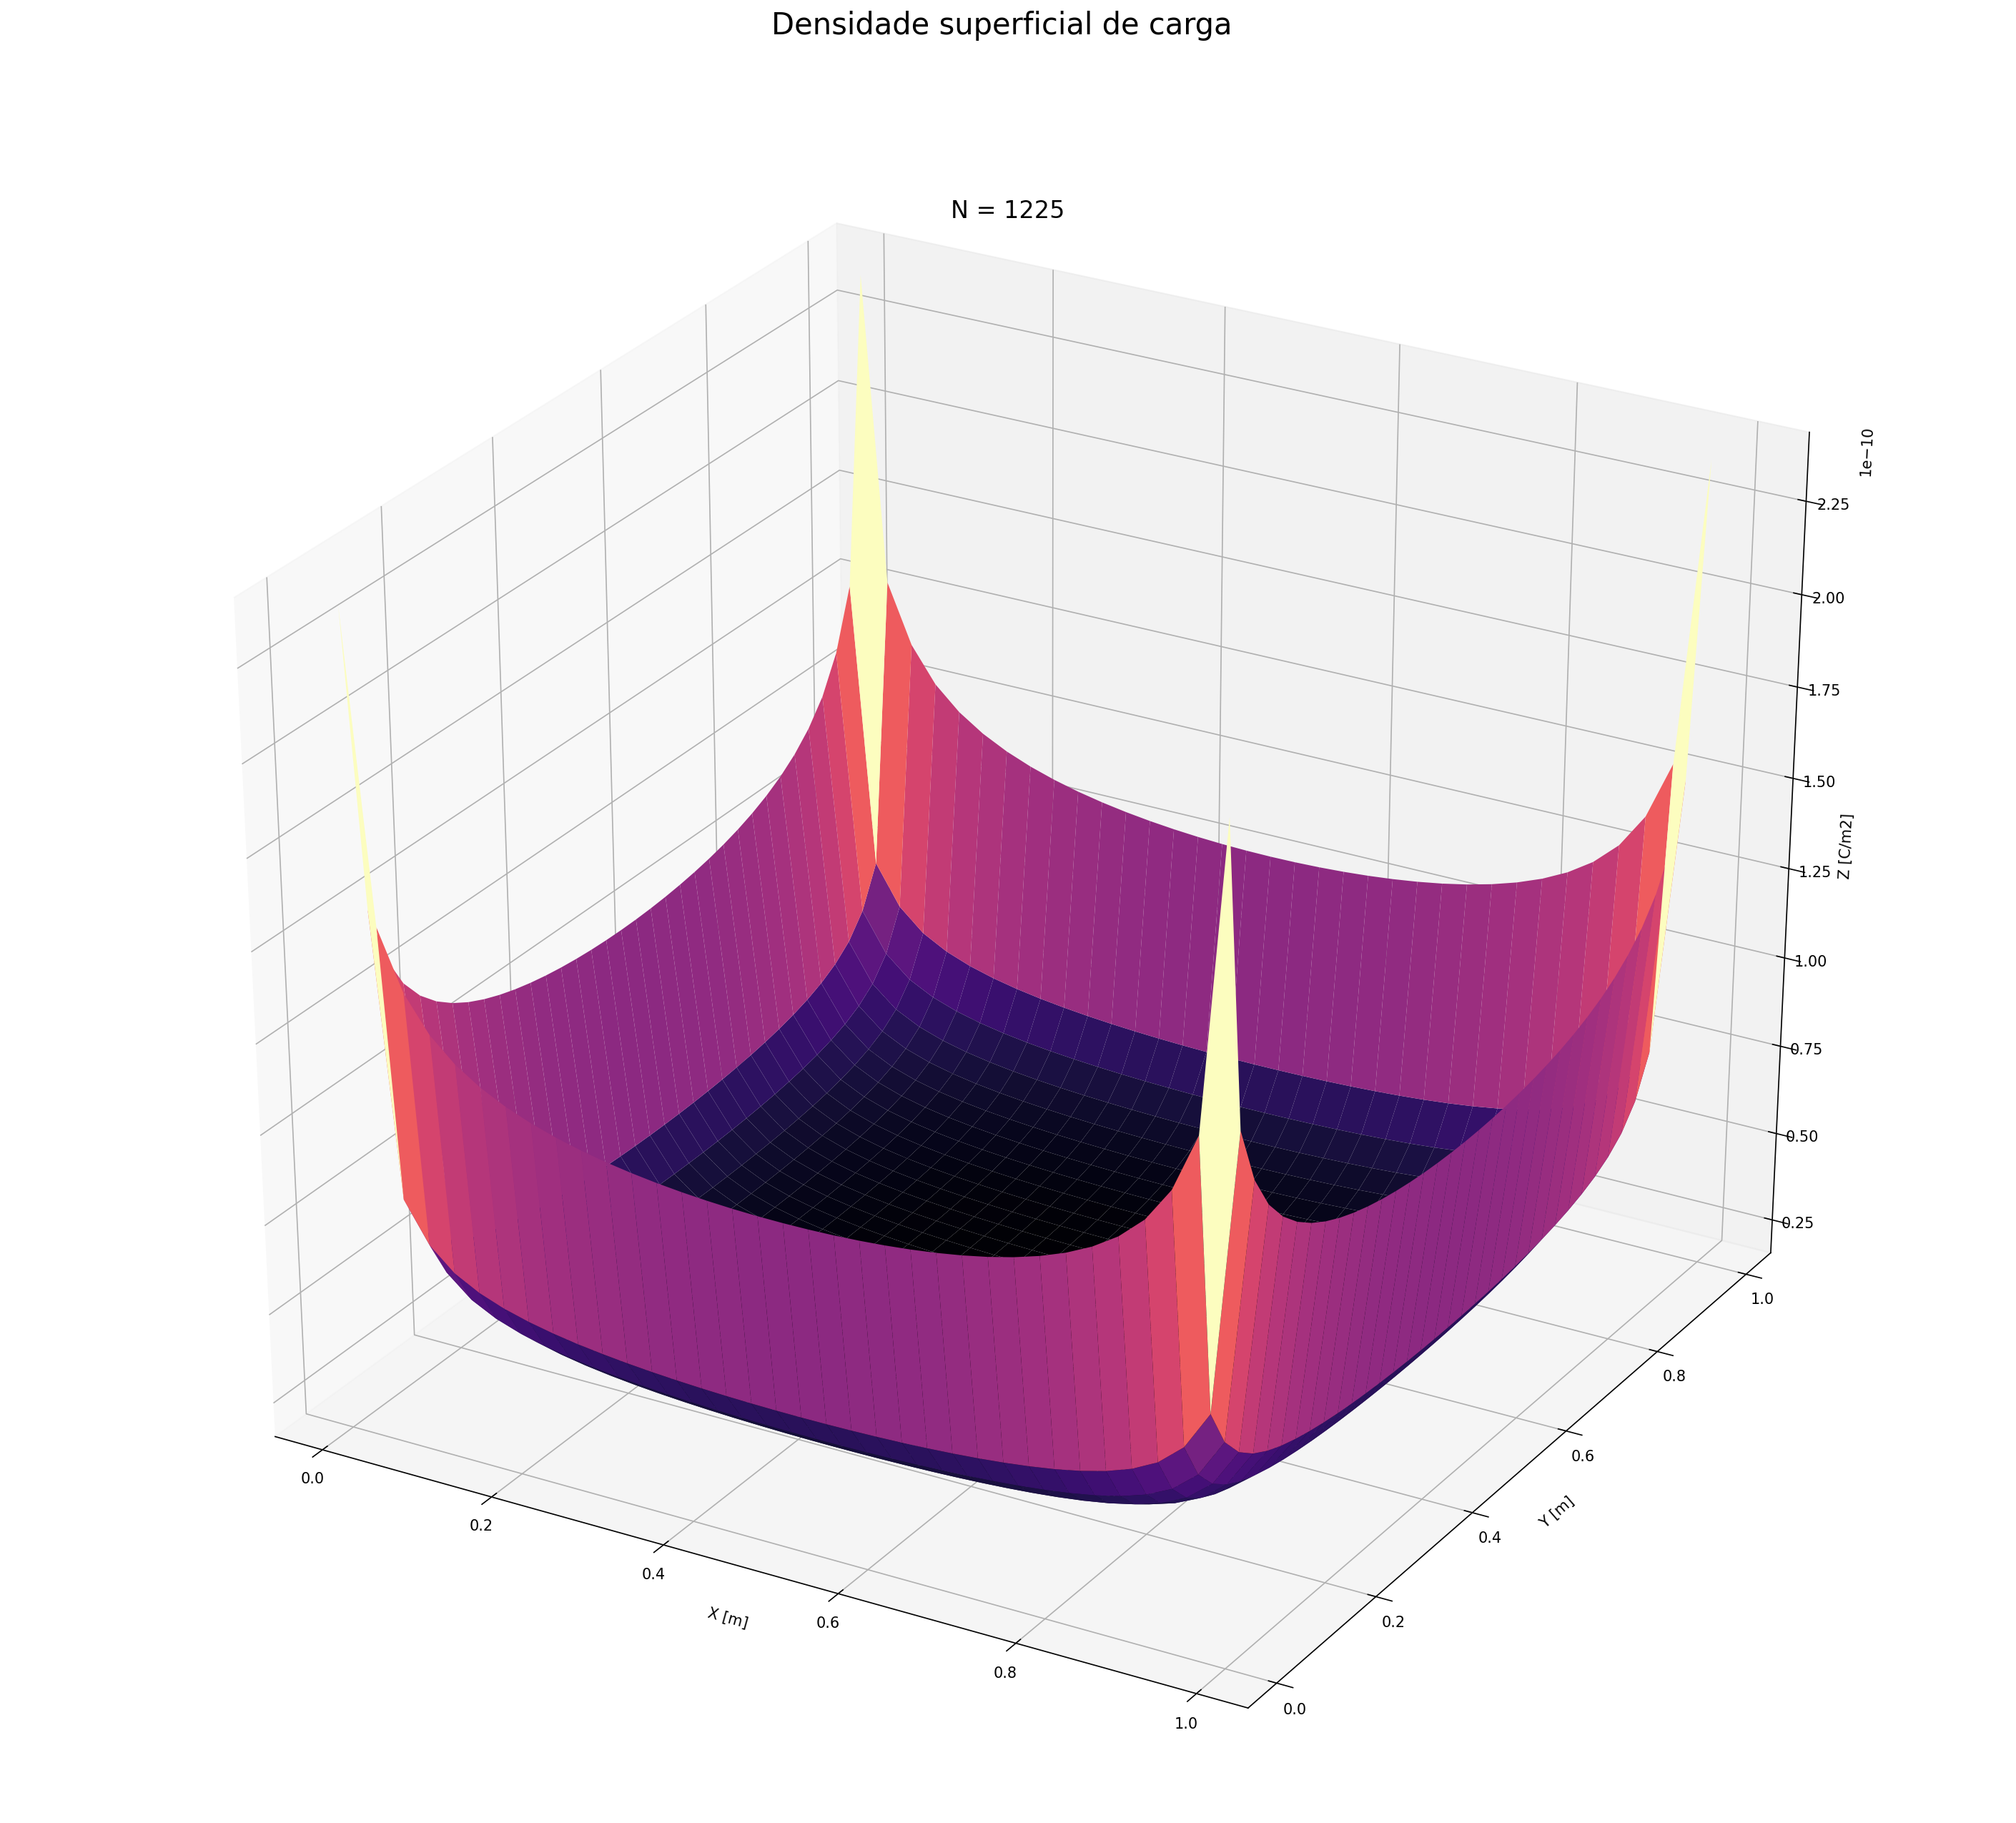

In [ ]:
result = densidade_placa(1225)
z_func, x_cv, y_cv, square_area = result

X, Y = x_cv, y_cv
Z = z_func

fig = plt.figure(figsize = (8 * 3, 7 * 3), dpi = 150)
fig.tight_layout()

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, 
                rstride=1, 
                cstride=1,
                cmap='magma',
                edgecolor='none',
                alpha = 1)
ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
ax.set_zlabel("Z [C/m2]")

# Plota o ponto de referência escolhido
# ax.scatter(xv, yv, zv, color = "blue")
# ax.scatter(x_m, y_m, 0, color = "red")

ax.set_title(f'N = {list_of_N[graph]}', fontsize = 16, pad = 20);
fig.suptitle("Densidade superficial de carga", x=0.51, y=0.925, fontsize = 20)
plt.savefig('temp.png', bbox_inches='tight')
plt.show()

In [ ]:
len(charge_sum), charge_sum

(9,
 [3.728771372787964e-11,
  3.870895992109249e-11,
  3.933064100684013e-11,
  3.952532719317793e-11,
  3.967657886729985e-11,
  3.979733415603053e-11,
  4.0156782238531996e-11,
  4.0437756777926726e-11,
  4.0554420850008074e-11])

In [ ]:
df = pd.DataFrame({"N": list_of_N, "Carga [C]": charge_sum}, index = None)
df

,N,Carga [C]
0,9,3.728771e-11
1,25,3.870896e-11
2,49,3.933064e-11
3,64,3.952533e-11
4,81,3.967658e-11
5,100,3.979733e-11
6,225,4.015678e-11
7,625,4.043776e-11
8,1225,4.055442e-11


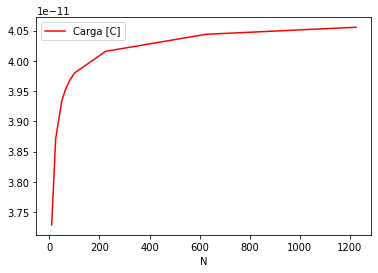

In [ ]:
plot = df.plot(x = "N", color = 'red')
fig = plot.get_figure()
fig.savefig('charge_by_N.png', bbox_inches='tight')

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

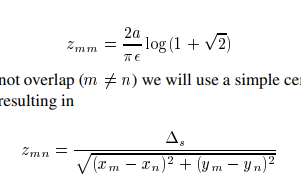

In [ ]:
# Parametros da placa e divisões
N = 30 ** 2
lenght = 1
square_patchs = int(math.sqrt(N))
a_double = lenght / square_patchs
a = a_double / 2

# print(f"Números quadrados: {square_patchs}")
# print(f"Tamanho do quadrado: {a_double}")

num = square_patchs + 1
x_div = np.linspace(0, lenght, num)
y_div = np.linspace(0, lenght, num)
z_div = np.zeros(square_patchs)

# Inicialização de variáveis no espaço R3
xv, yv, zv = np.meshgrid(x_div, y_div, z_div)

x_c = x_div[0:-1] + a
y_c = y_div[0:-1] + a
z_c = z_div.copy()


# Variáveis para plot
x_cv, y_cv = np.meshgrid(x_c, y_c)

# print(x_div, y_div, z_div)
# print("\n\n")
# print(x_c, y_c, z_c)
# print(f"Divisões em X:\n{xv}")
# print(f"Divisões em Y:\n{yv}")
# print(f"Divisões em Z:\n{zv}")

In [ ]:
def density(x, y, x_m, y_m, a = a, a_double = a_double):
  eps = 8.854 * 10 ** (-12)
  
  Z = (a_double ** 2)/(4 * math.pi * eps * np.sqrt(np.power((x_m - x), 2)+ np.power((y_m - y), 2)))
  return Z

def density_same(a = a, a_double = a_double):  
  eps = 8.854 * 10 ** (-12)

  Z = (2*a)/(2* math.sqrt(math.pi) * eps)
  return Z

# z_func = density(x_cv, y_cv)
# print(f"{z_func}")

In [ ]:
# print(f"Shape: {z_func.shape}")
# print((N, x_div.shape[0], y_div.shape[0]))

list_of_z = np.zeros((square_patchs, square_patchs))
print(list_of_z.shape)
# print(list_of_z)

(30, 30)


In [ ]:
# PRIMEIRO QUADRADO M = 1
matriz_z = []

for i in range(x_c.shape[0]):
  for j in range(y_c.shape[0]):

    x_m = x_c[i]
    y_m = y_c[j]

    for m in range(x_c.shape[0]):
        for n in range(y_c.shape[0]):
          if ((m == i) and (n == j)):
            list_of_z[m][n] = density_same()
          else:
            list_of_z[m][n] = density(x = x_c[m], y = y_c[n], x_m = x_m, y_m = y_m)

    linha_matriz = np.concatenate(list_of_z)

    matriz_z.append(linha_matriz)
  
matriz_z_array = np.array(matriz_z)
matriz_z_array

array([[1.06202391e+09, 2.99591415e+08, 1.49795707e+08, ...,
        7.56100521e+06, 7.43194832e+06, 7.30493520e+06],
       [2.99591415e+08, 1.06202391e+09, 2.99591415e+08, ...,
        7.69195214e+06, 7.56100521e+06, 7.43194832e+06],
       [1.49795707e+08, 2.99591415e+08, 1.06202391e+09, ...,
        7.82460420e+06, 7.69195214e+06, 7.56100521e+06],
       ...,
       [7.56100521e+06, 7.69195214e+06, 7.82460420e+06, ...,
        1.06202391e+09, 2.99591415e+08, 1.49795707e+08],
       [7.43194832e+06, 7.56100521e+06, 7.69195214e+06, ...,
        2.99591415e+08, 1.06202391e+09, 2.99591415e+08],
       [7.30493520e+06, 7.43194832e+06, 7.56100521e+06, ...,
        1.49795707e+08, 2.99591415e+08, 1.06202391e+09]])

In [ ]:
# print(f"Matriz diagonal: \n{z_func}")

eps = 8.854 * 10 ** (-12)

inv_matrix = np.linalg.inv(matriz_z_array)
#print(inv_matrix)

one_vector = np.array([[1]] * matriz_z_array.shape[0])
#print(one_vector)

print("Resultado C-dot")

resultado = np.matmul(inv_matrix, one_vector)
# print(resultado)

z_func = np.array_split(resultado, square_patchs)

z_func = np.stack(list(z_func)).reshape(square_patchs, square_patchs)
print(z_func.shape)
print(z_func)
# print(z_func.reshape(3, 3))

Resultado C-dot
(30, 30)
[[2.14396126e-10 1.39577134e-10 1.25237365e-10 1.16720703e-10
  1.11171776e-10 1.07214428e-10 1.04252933e-10 1.01974133e-10
  1.00195865e-10 9.88044927e-11 9.77257561e-11 9.69097997e-11
  9.63229326e-11 9.59428946e-11 9.57560996e-11 9.57560996e-11
  9.59428946e-11 9.63229326e-11 9.69097997e-11 9.77257561e-11
  9.88044927e-11 1.00195865e-10 1.01974133e-10 1.04252933e-10
  1.07214428e-10 1.11171776e-10 1.16720703e-10 1.25237365e-10
  1.39577134e-10 2.14396126e-10]
 [1.39577134e-10 6.99328066e-11 6.01486580e-11 5.47600024e-11
  5.14979760e-11 4.92728554e-11 4.76578334e-11 4.64419661e-11
  4.55083024e-11 4.47865251e-11 4.42319827e-11 4.38153571e-11
  4.35171708e-11 4.33247159e-11 4.32303038e-11 4.32303038e-11
  4.33247159e-11 4.35171708e-11 4.38153571e-11 4.42319827e-11
  4.47865251e-11 4.55083024e-11 4.64419661e-11 4.76578334e-11
  4.92728554e-11 5.14979760e-11 5.47600024e-11 6.01486580e-11
  6.99328066e-11 1.39577134e-10]
 [1.25237365e-10 6.01486580e-11 5.0446382

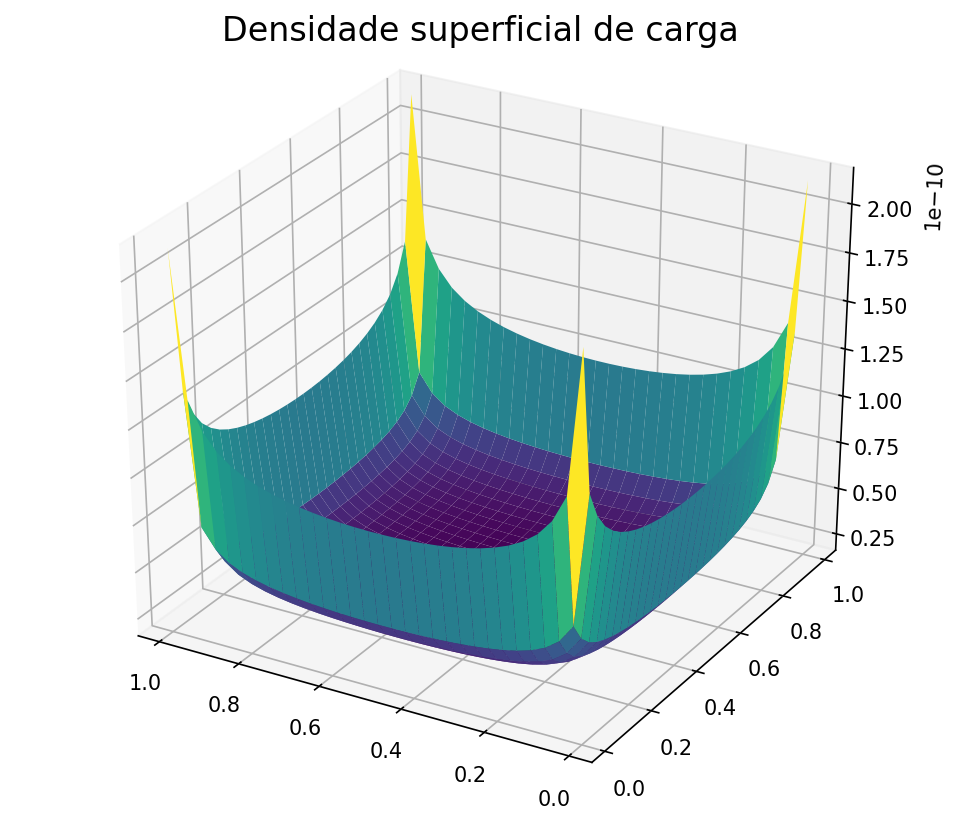

In [ ]:
fig = plt.figure(figsize = (8, 7), dpi = 150)
ax = plt.axes(projection = '3d')

X, Y = x_cv, y_cv
Z = z_func

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

ax.plot_surface(X, Y, Z, 
                rstride=1, 
                cstride=1,
                cmap='viridis',
                edgecolor='none',
                alpha = 1)

# Plota o ponto de referência escolhido
# ax.scatter(xv, yv, zv, color = "blue")
# ax.scatter(x_m, y_m, 0, color = "red")
ax.set_title('Densidade superficial de carga', fontsize = 16, pad = 20);

# Rascunho:


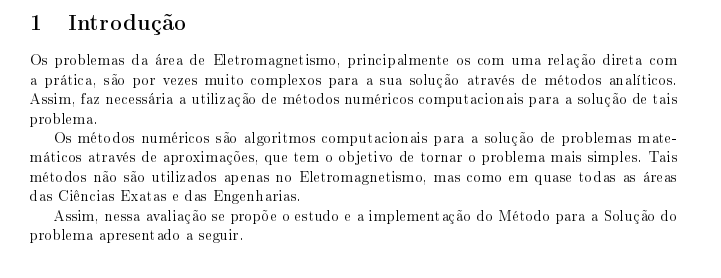

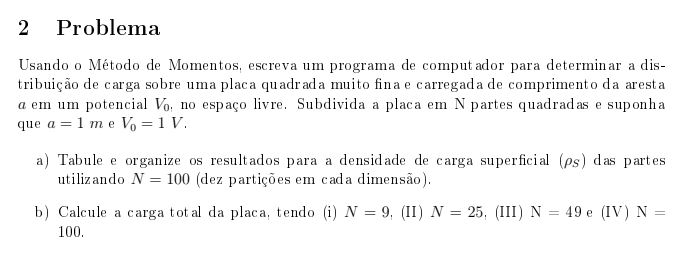


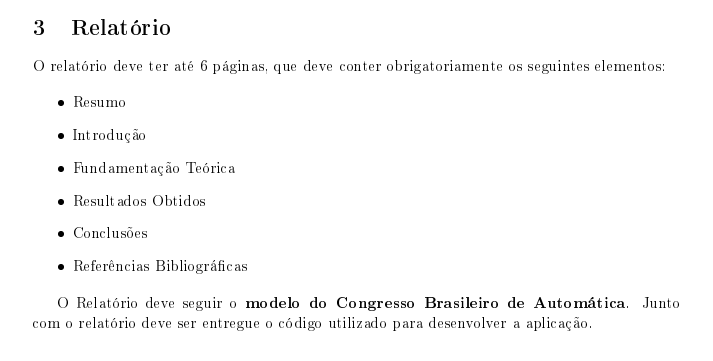